In [5]:
from matplotlib import pyplot as plt
import numpy as np
from torchvision import datasets
from scipy.stats import spearmanr
import torch

In [7]:
from torchvision import datasets
imagenet_root = '/mnt/qb/datasets/ImageNet2012'
imagenet = datasets.ImageNet(imagenet_root, split='train')

In [8]:
fnames_imagenet = np.asarray([el.split(".")[0] for el in np.load("./data/imagenet_file_names.npy")])
fnames_nfl = np.asarray([el.split(".")[0] for el in np.load("./data/neglected_free_lunch_file_names.npy")])
interesection_fnames = np.isin(fnames_imagenet, fnames_nfl)
loss = np.load("./data/losses.npy")
# print(f"Imagenet length {fnames_imagenet.shape}, NFL length {fnames_nfl.shape}, Loss length {loss.shape}, Loss masked {loss[interesection_fnames].shape}")

estimate_times=np.load('data/sample_estimate_times.npy')
selected_counts=np.load('data/sample_selected_counts.npy')
selecteds=np.load('data/sample_selecteds.npy')
worker_ids=np.load('data/sample_worker_ids.npy')
losses = np.load('data/losses.npy')
losses_86 = np.load('data/losses_86.npy')
mouse_record_times=np.load('data/sample_mouse_record_times.npy')
hovered_record_times=np.load('data/sample_hovered_record_times.npy')
labels = np.load('data/sample_labels.npy')
assignments = np.load('data/sample_assignment_ids.npy')

In [9]:
print(f"{selecteds.sum()}, {fnames_imagenet.shape}")

1271643, (1281167,)


In [14]:
def plot_loss_estimateTimes(wid, label, aid):
    mask = np.logical_and(worker_ids==wid, assignments==aid)
    mask = np.logical_and(mask, labels == label)
    plt.scatter(losses[mask], estimate_times[mask])

wid = "01CA538B53"
wid = "F89C77DD5F"
wid = "A3C6DDBFB7"
l = 737
l = 3
aid = "3WAKVUDHU68MHMIB5UFINMQZUK1U70"
aid = "3ZV9H2YQQNZH876TYIRTSTZGCD13WA"
aid = "308Q0PEVBI5LMEB4QAOOIFTUYZ3I90"
print(sranks[wid][3])
# plot_loss_estimateTimes(1, 0, 1)

NameError: name 'sranks' is not defined

SignificanceResult(statistic=0.07142857142857144, pvalue=0.8665262706759088) -0.7211762968567651


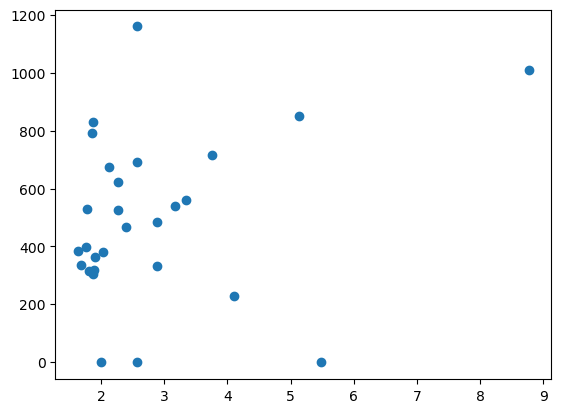

In [ ]:
wmask = worker_ids==wid
lmask = labels==l
amask = assignments==aid
mask = np.logical_and(wmask, lmask)
mask = np.logical_and(mask, wmask)

print(sranks[wid][l][aid], correlations[wid][l][aid])
plt.scatter(losses[mask], estimate_times[mask])

In [11]:
def per_class(losses_tmp):
    drop_last = 1281024
    losses_tmp = losses_tmp[:drop_last]
    per_class_correlations = []
    per_class_srank = []
    emask = estimate_times[:drop_last] <=10000
    for l in np.unique(labels):
        # this_class = []
        lmask = labels[:drop_last]==l
        mask = np.logical_and(lmask, emask)
        mask = np.logical_and(mask, selecteds[:drop_last])
        if mask.sum()>0:
            per_class_correlations.append(np.corrcoef(losses_tmp[mask], estimate_times[:drop_last][mask])[0,1])
            per_class_srank.append(spearmanr(losses_tmp[mask], estimate_times[:drop_last][mask])[0])
    plt.plot(per_class_correlations)
    plt.show()
    plt.plot(per_class_srank)
    plt.show()

def per_worker(losses_tmp, e_thr = 10000, title = ""):
    drop_last = 1281024
    losses_tmp = losses_tmp[:drop_last]
    per_class_correlations = []
    per_class_srank = []
    emask = estimate_times[:drop_last] <=e_thr
    for w in np.unique(worker_ids):
        # this_class = []
        wmask = worker_ids[:drop_last]==w
        mask = np.logical_and(wmask, emask)
        mask = np.logical_and(mask, selecteds[:drop_last])
        if mask.sum()>0:
            per_class_correlations.append(np.corrcoef(losses_tmp[mask], estimate_times[:drop_last][mask])[0,1])
            per_class_srank.append(spearmanr(losses_tmp[mask], estimate_times[:drop_last][mask])[0])
    plt.plot(per_class_correlations)
    plt.plot(np.ones_like(per_class_correlations)*np.mean(per_class_correlations), "r--")
    plt.title(f"{title} Correlation per worker, e_thr={e_thr}")
    plt.show()
    plt.plot(per_class_srank)
    plt.plot(np.ones_like(per_class_srank)*np.mean(per_class_srank), "r--")
    plt.title(f"{title} per_class_srank , e_thr={e_thr}")
    plt.show()

def per_assignment(losses_tmp, e_thr=10000, title=""):
    drop_last = 1281024
    losses_tmp = losses_tmp[:drop_last]
    correlations = []
    srank = []
    emask = estimate_times[:drop_last] <=e_thr
    for a in np.unique(assignments):
        amask = worker_ids[:drop_last]==a
        aemask = np.logical_and(amask, emask)
        mask = np.logical_and(aemask, selecteds[:drop_last])
        if mask.sum()>0:
            correlations.append(np.corrcoef(losses_tmp[mask], estimate_times[:drop_last][mask])[0,1])
            srank.append(spearmanr(losses_tmp[mask], estimate_times[:drop_last][mask])[0])
    plt.plot(correlations)
    plt.plot(np.ones_like(correlations)*np.mean(correlations), "r--")
    plt.title(f"{title} Correlation per worker, e_thr={e_thr}")
    plt.show()
    plt.plot(srank)
    plt.plot(np.ones_like(srank)*np.mean(srank), "r--")
    plt.title(f"{title} per_class_srank , e_thr={e_thr}")
    plt.show()

In [12]:
loss_VITB = np.asarray(torch.load('data/losses_ViTB.npy').cpu().detach())
l_r50_0_p = "/mnt/qb/work/oh/owl156/NeglectedFreeLunch/data/resnet50_losses_0.npy"
l_r50_5_p = "/mnt/qb/work/oh/owl156/NeglectedFreeLunch/data/resnet50_losses_5.npy"
l_r50_10_p = "/mnt/qb/work/oh/owl156/NeglectedFreeLunch/data/resnet50_losses_10.npy"
l_r50_15_p = "/mnt/qb/work/oh/owl156/NeglectedFreeLunch/data/resnet50_losses_15.npy"
l_r50_20_p = "/mnt/qb/work/oh/owl156/NeglectedFreeLunch/data/resnet50_losses_final_weights.npy"


loss_paths = [l_r50_0_p, l_r50_5_p, l_r50_10_p, l_r50_15_p, l_r50_20_p]

l_r50_0 = np.load(l_r50_0_p)
l_r50_5 = np.load(l_r50_5_p)
l_r50_10 = np.load(l_r50_10_p)
l_r50_15 = np.load(l_r50_15_p)
l_r50_20 = np.load(l_r50_20_p)

l_r50 = [l_r50_0, l_r50_5, l_r50_10, l_r50_15, l_r50_20]


all_losses = {
    "resnet18":losses,
    "resnet50_0":l_r50_0,
    "resnet50_5":l_r50_5,
    "resnet50_10":l_r50_10,
    "resnet50_15":l_r50_15,
    "resnet50_20":l_r50_20,
    "ViT_B":loss_VITB
}

NameError: name 'l_r50_0' is not defined

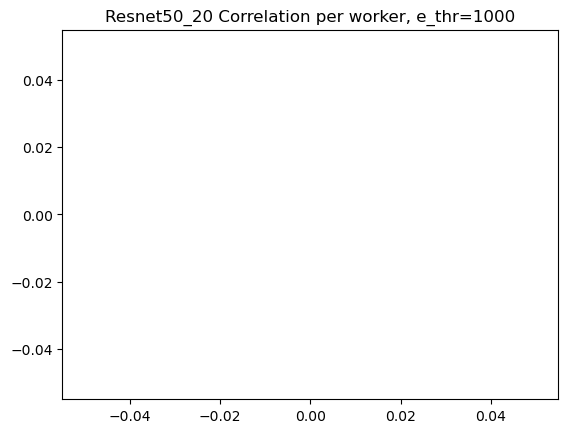

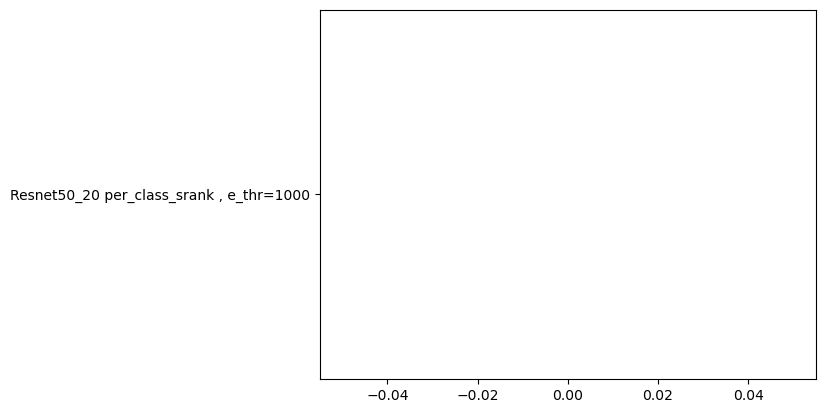

In [153]:
per_assignment(l_r50_20, e_thr=1000 , title="Resnet50_20")

In [10]:
for k, l in all_losses.items():
    per_worker(l, e_thr=3000, title = k)
    print("----")

NameError: name 'all_losses' is not defined

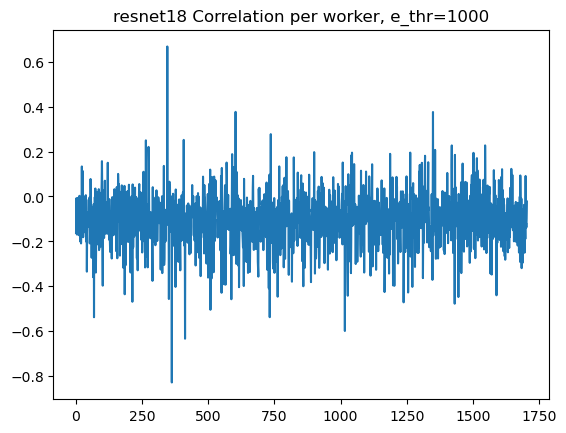

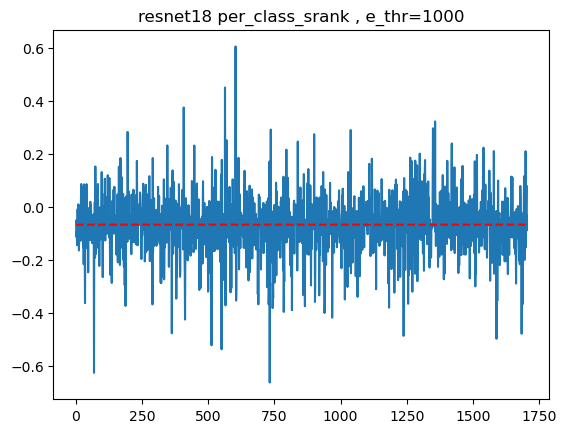

----


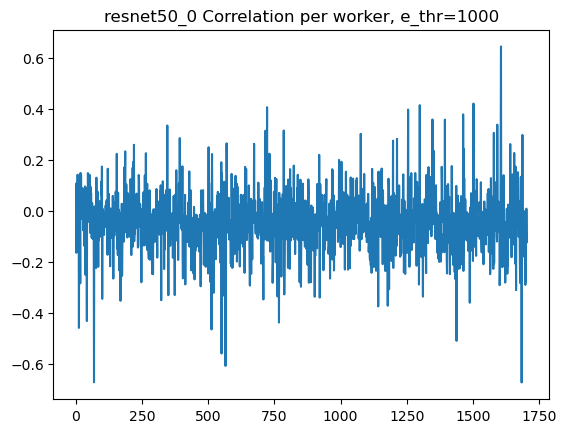

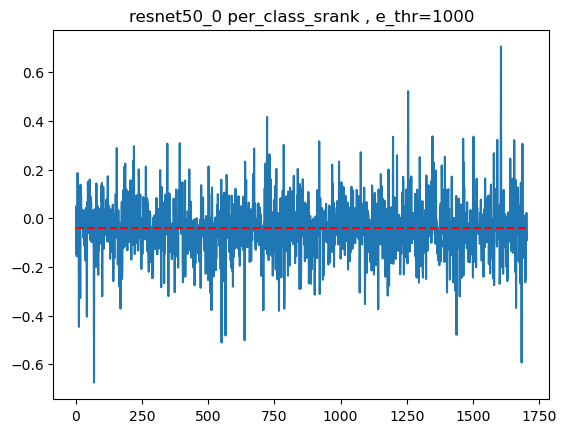

----


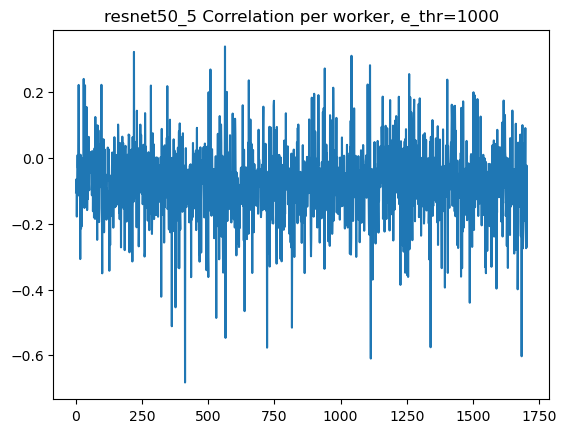

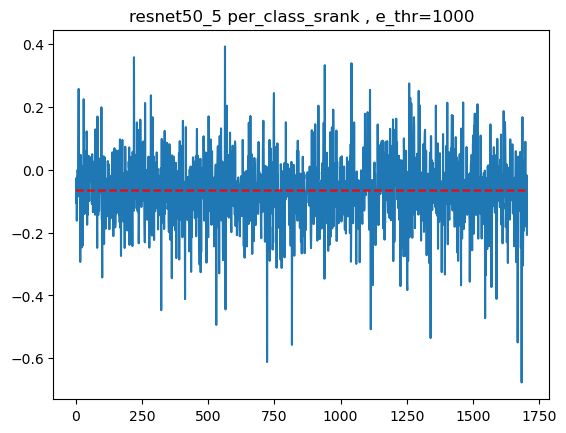

----


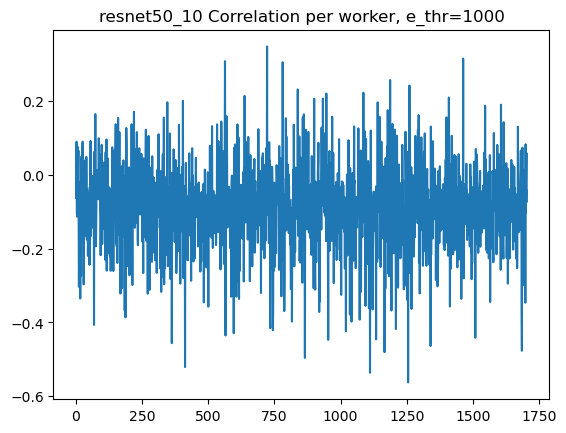

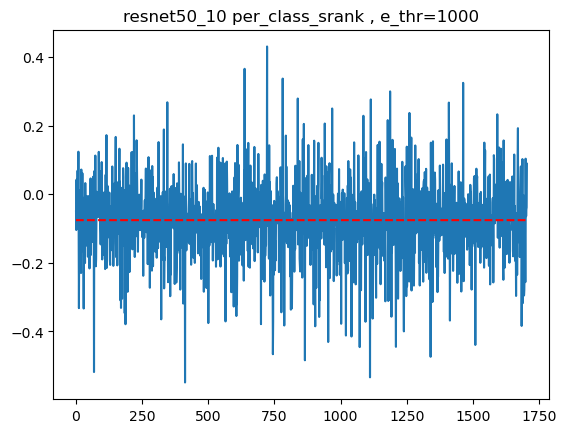

----


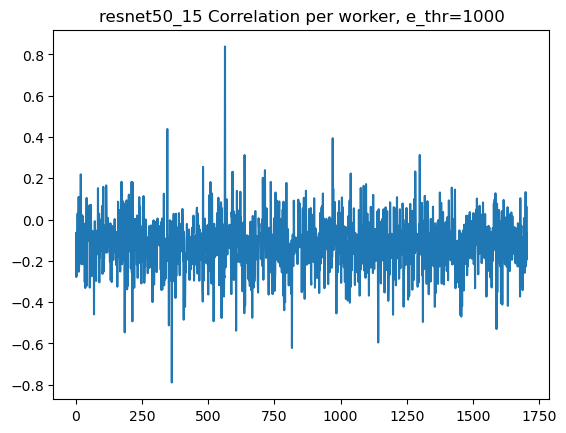

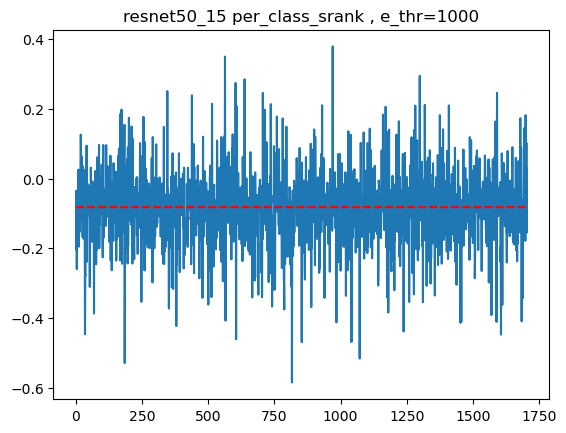

----


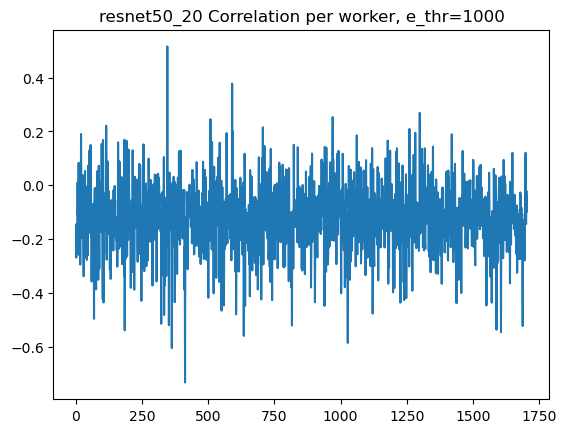

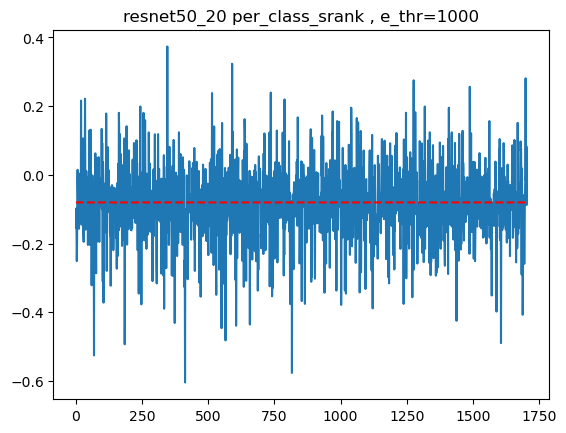

----


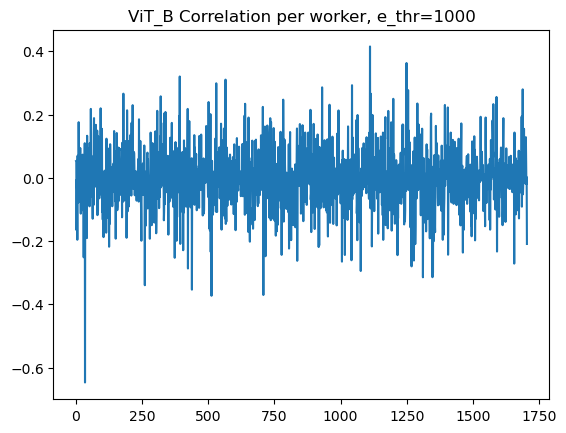

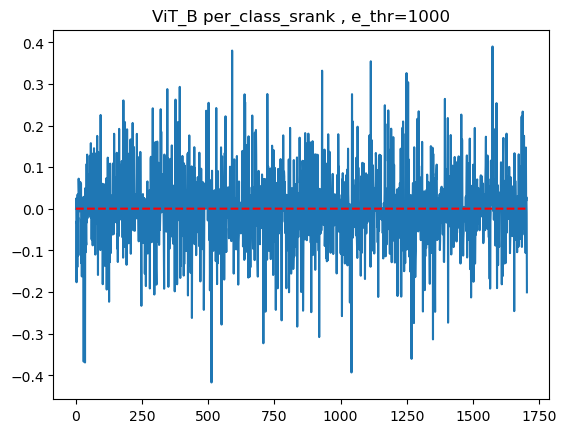

----


In [156]:
for k,l in all_losses.items():
    per_worker(l, e_thr=1000, title=k)
    print("----")

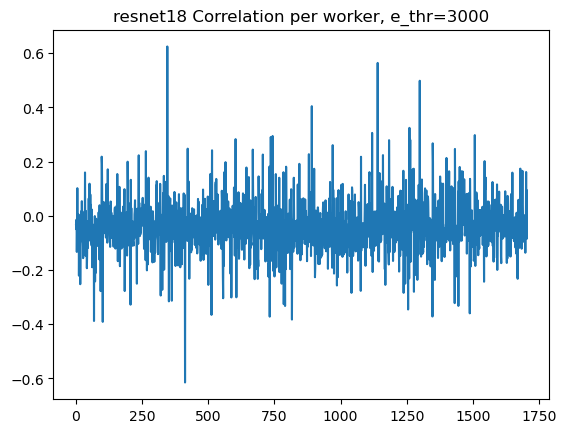

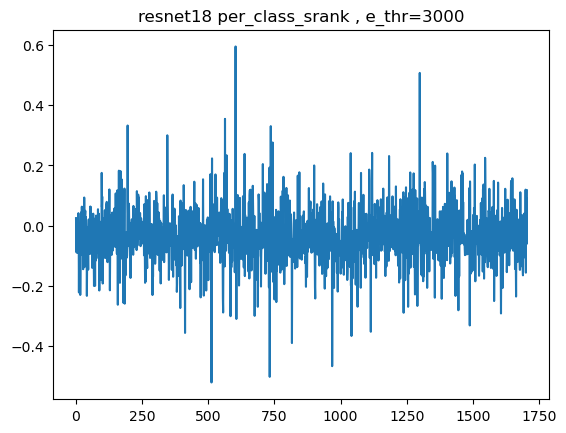

----


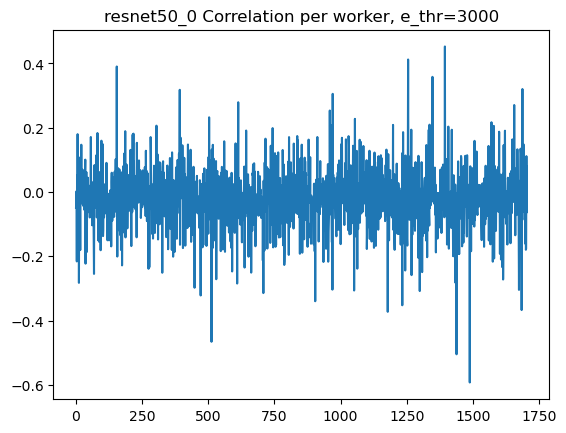

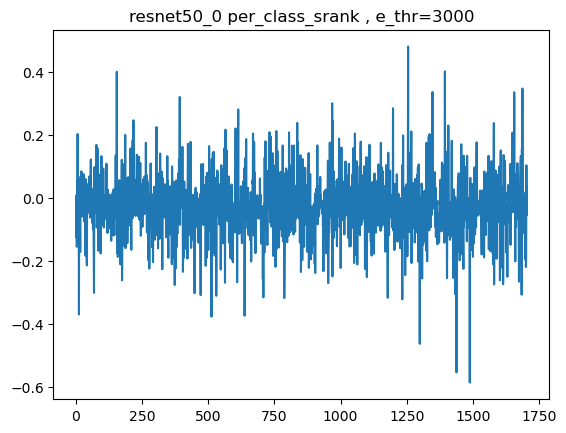

----


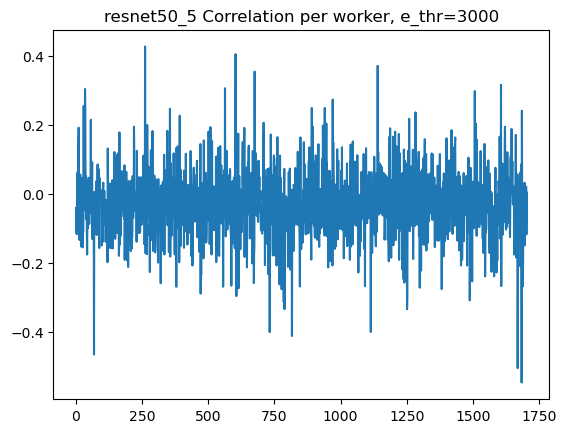

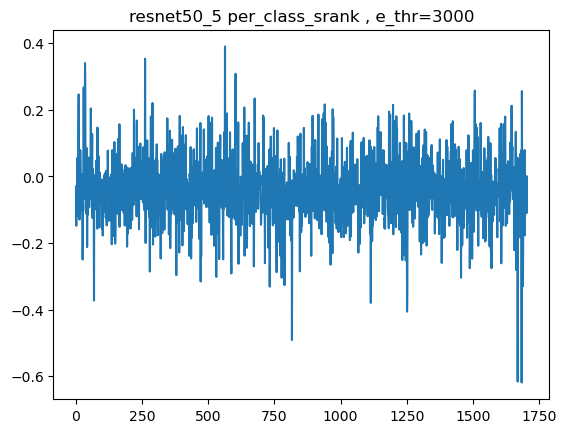

----


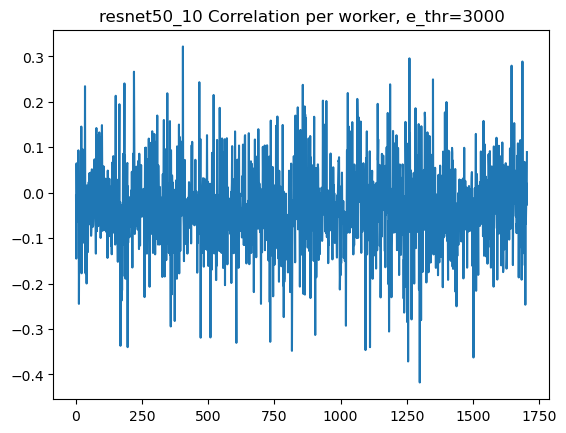

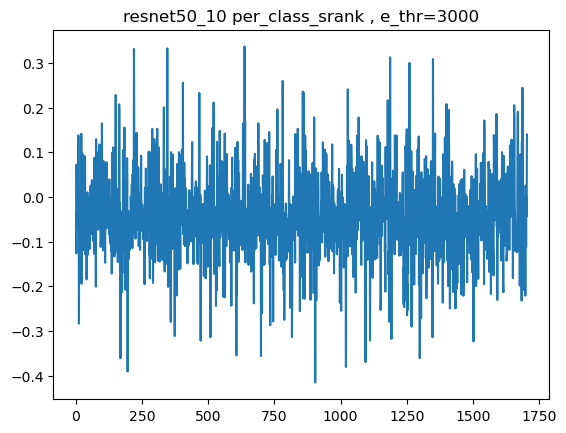

----


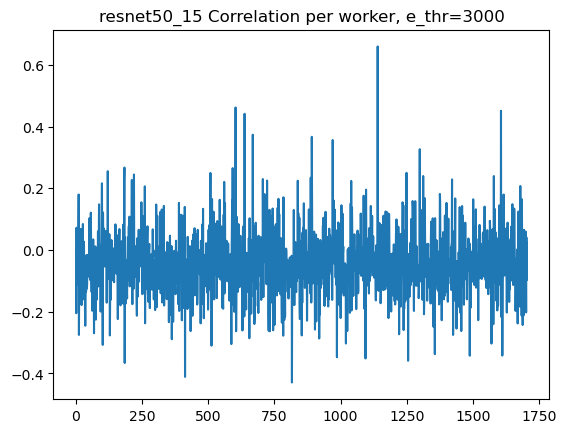

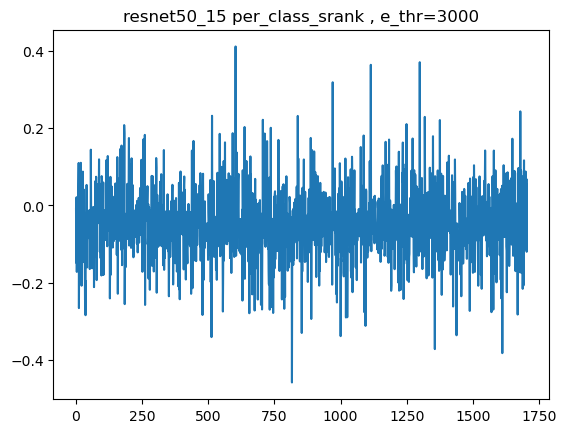

----


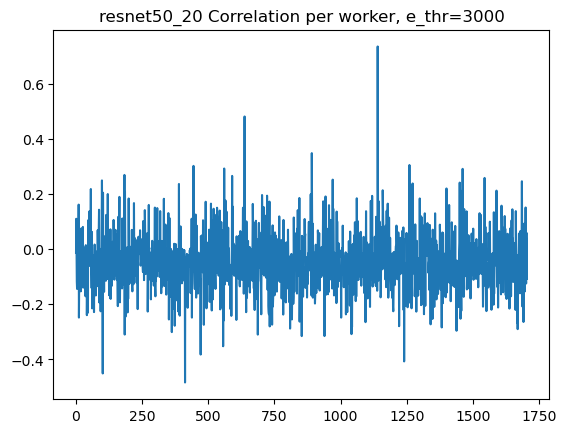

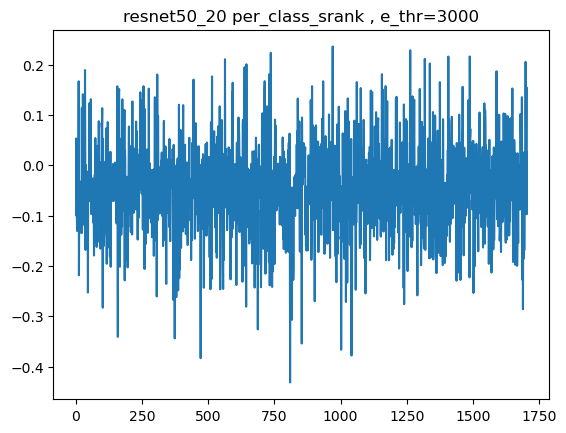

----


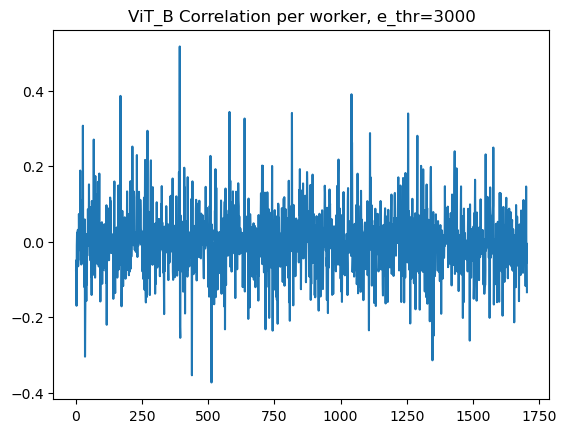

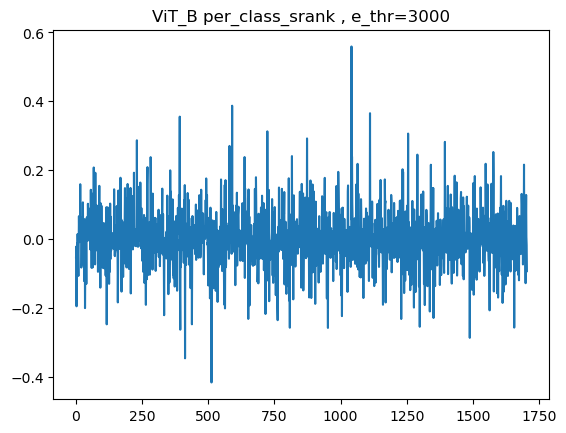

----


In [135]:
for k,l in all_losses.items():
    per_worker(l, e_thr=3000, title=k)
    print("----")

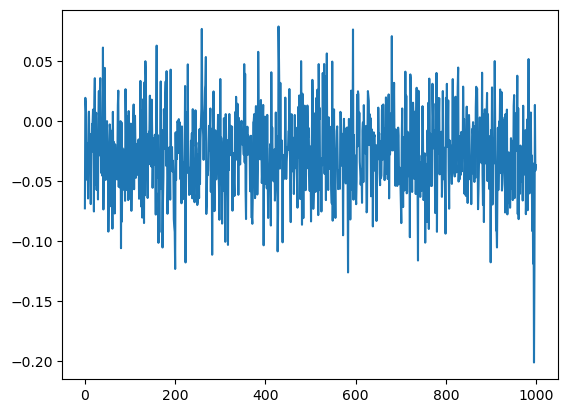

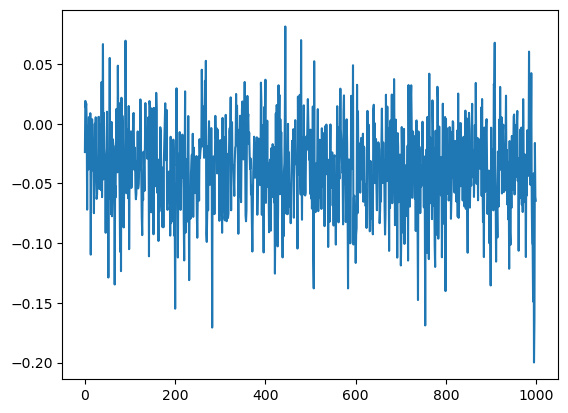

In [118]:
per_class(losses)

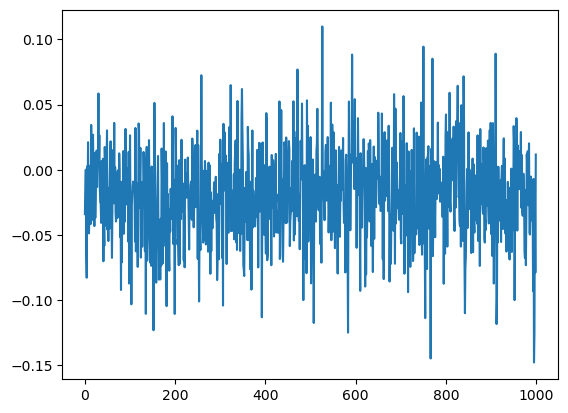

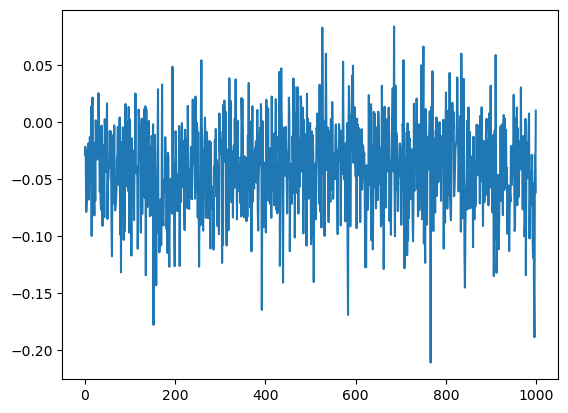

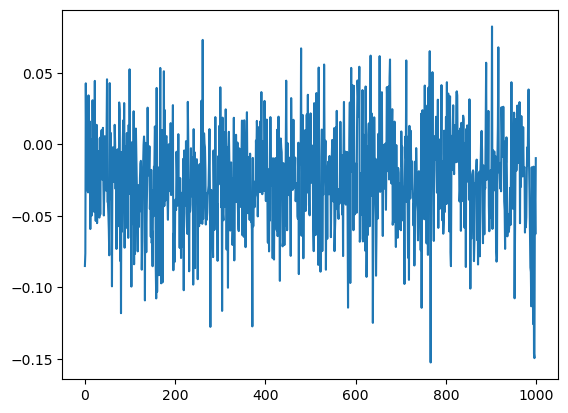

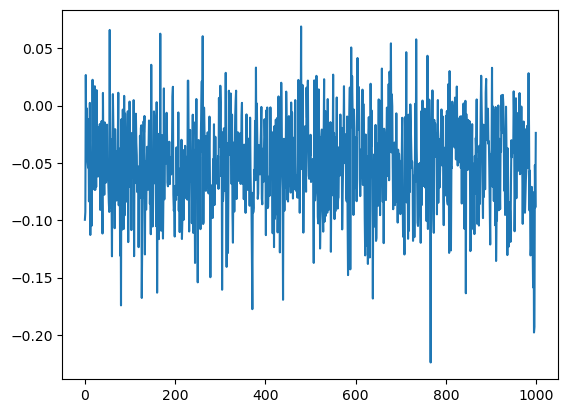

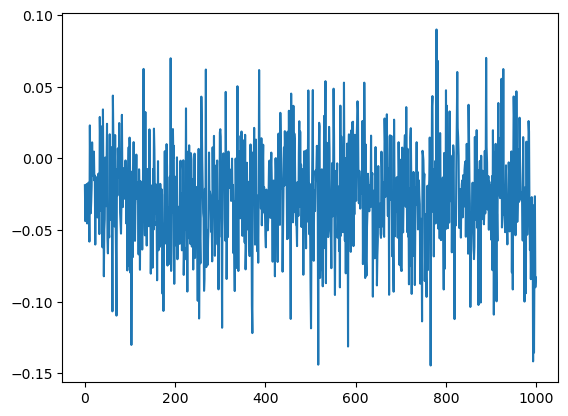

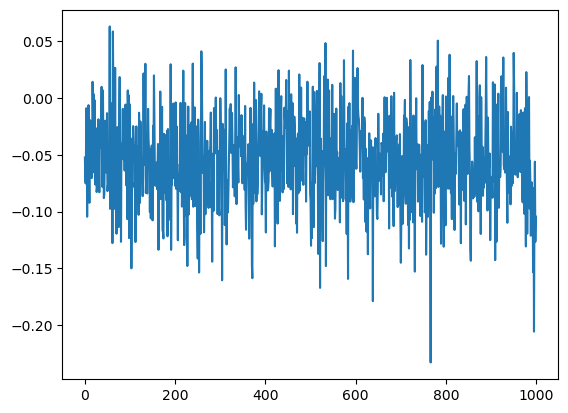

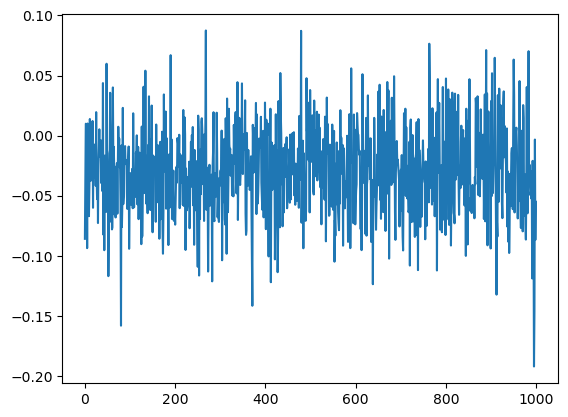

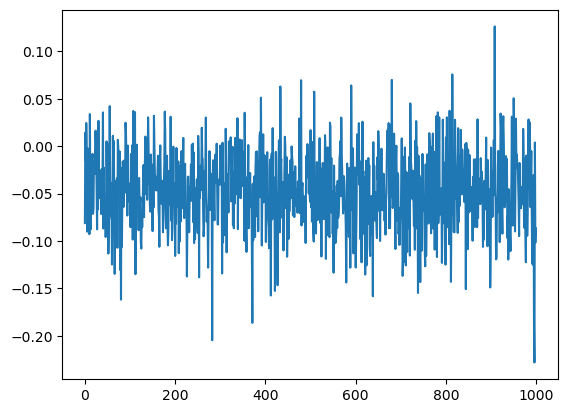

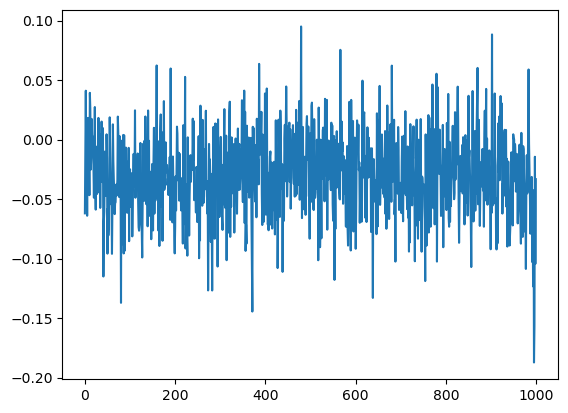

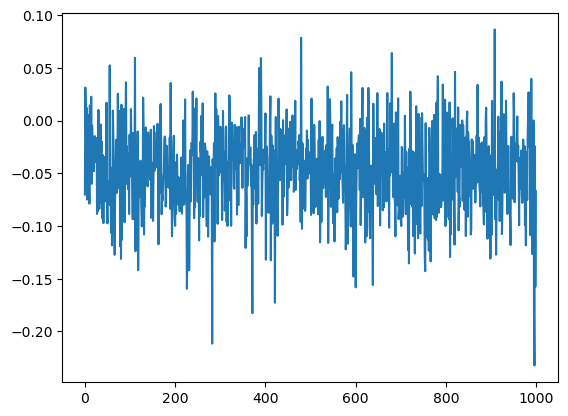

In [96]:
for loss in l_r50:
    per_class(loss)

In [115]:
loss_VITB.shape, losses[:1281024].shape

((1281024,), (1281024,))

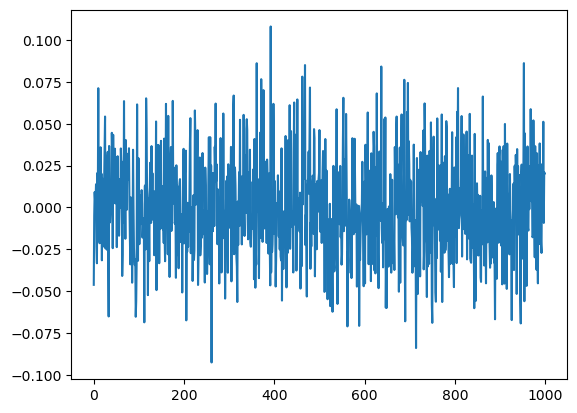

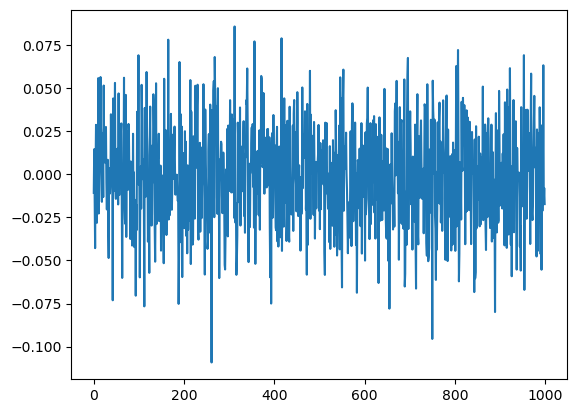

In [119]:
per_class(loss_VITB)

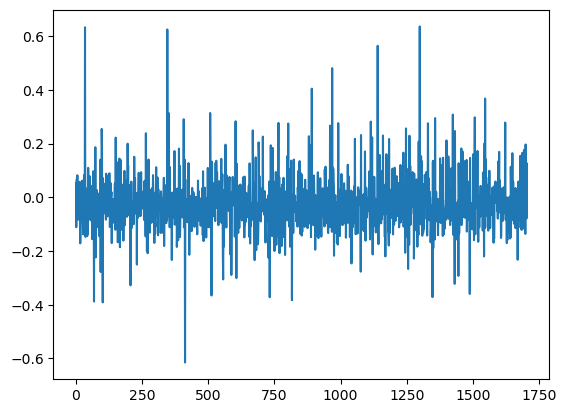

In [86]:
per_worker_correlations = []
per_worker_srank = []
emask = estimate_times <=10000
for wid in np.unique(worker_ids):
    # this_class = []
    wmask = worker_ids==wid
    mask = np.logical_and(wmask, emask)
    mask = np.logical_and(mask, selecteds)
    if mask.sum()>0:
        per_worker_correlations.append(np.corrcoef(losses[mask], estimate_times[mask])[0,1])
        per_worker_srank.append(spearmanr(losses[mask], estimate_times[mask])[0])


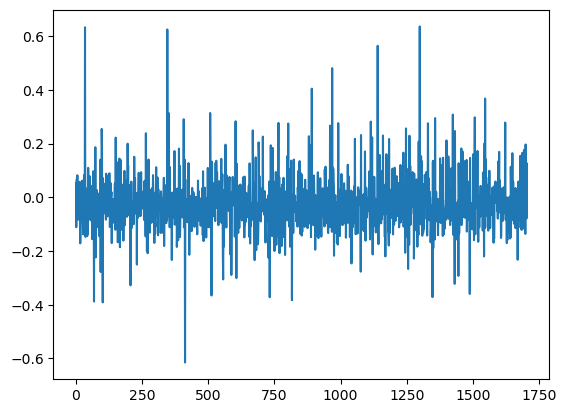

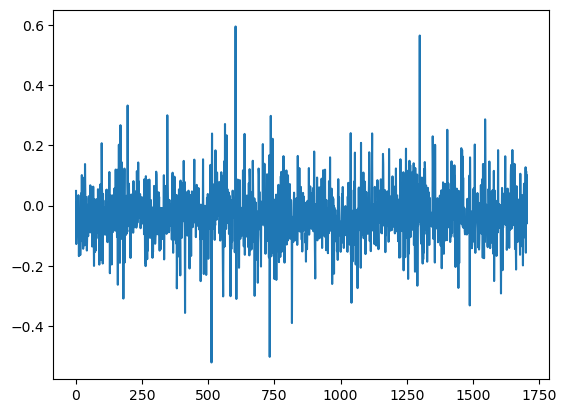

In [88]:
plt.plot(per_worker_correlations)
plt.show()
plt.plot(per_worker_srank)


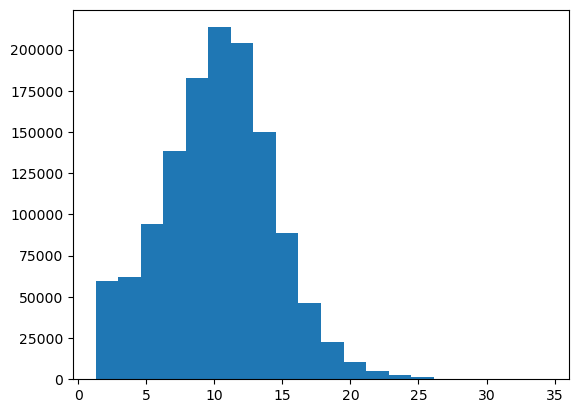

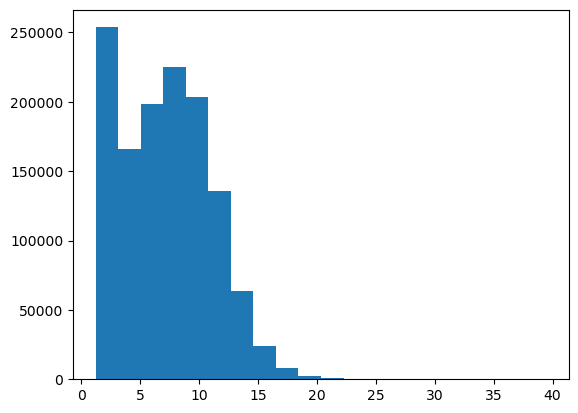

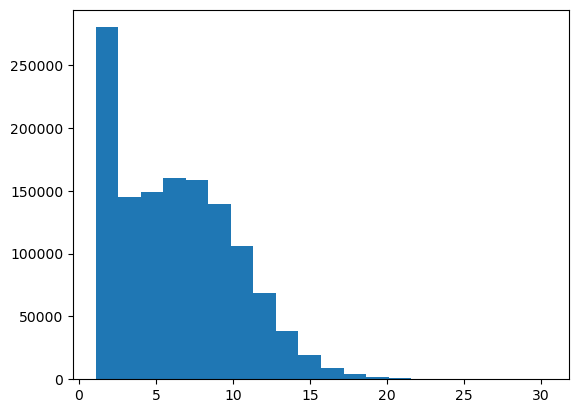

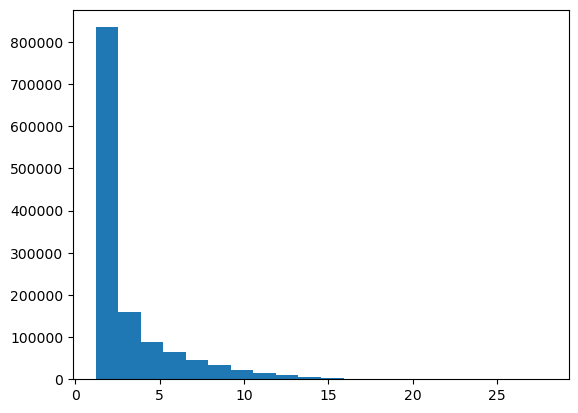

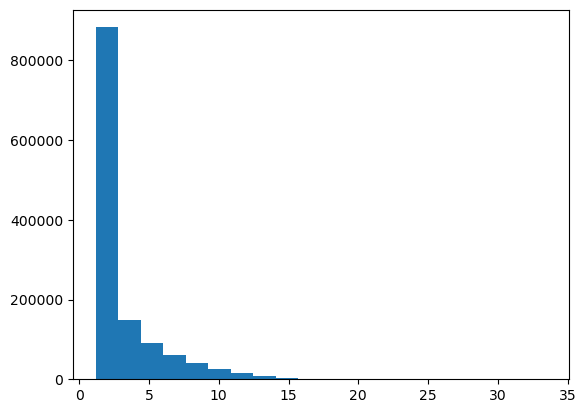

In [95]:
l_r50_0_p = "/mnt/qb/work/oh/owl156/NeglectedFreeLunch/data/resnet50_losses_0.npy"
l_r50_5_p = "/mnt/qb/work/oh/owl156/NeglectedFreeLunch/data/resnet50_losses_5.npy"
l_r50_10_p = "/mnt/qb/work/oh/owl156/NeglectedFreeLunch/data/resnet50_losses_10.npy"
l_r50_15_p = "/mnt/qb/work/oh/owl156/NeglectedFreeLunch/data/resnet50_losses_15.npy"
l_r50_20_p = "/mnt/qb/work/oh/owl156/NeglectedFreeLunch/data/resnet50_losses_final_weights.npy"


loss_paths = [l_r50_0_p, l_r50_5_p, l_r50_10_p, l_r50_15_p, l_r50_20_p]

l_r50_0 = np.load(l_r50_0_p)
l_r50_5 = np.load(l_r50_5_p)
l_r50_10 = np.load(l_r50_10_p)
l_r50_15 = np.load(l_r50_15_p)
l_r50_20 = np.load(l_r50_20_p)

l_r50 = [l_r50_0, l_r50_5, l_r50_10, l_r50_15, l_r50_20]

for p in loss_paths:
    loss = np.load(p)
    plt.hist(loss, bins=20)
    plt.show()